#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 8**
###**Máquina de Vector Soporte - Support Vector Machine(SVM)**


**Nombres y matrículas de los integrantes del equipo:**

*   Dante Cesar Cervantes Gutiérrez. / Matricula: a01794585
*   Joan Sebastian Jiménez Chacón. / Matricula: a01793970
*   Juan Felipe Toro Salgado. / Matricula: a01794247
*   Israel Campos Baez. / Matricula: a01334976
*   Jose Alberto Almada Gerardo. / Matricula: a01794415

Se trabajará con el conjunto de datos conocido como "Australian credit approval", un problema de clasificación que ya has estudiado en semanas previas y cuyos datos puedes encontrar en la siguiente liga del repositorio de la UCI:

https://raw.githubusercontent.com/JorgeRamos01/Random-matrices-6/master/australian.csv

El objetivo es determinar si se autoriza una tarjeta de crédito dada cierta información del solicitante. En la página de la UCI encuentras mayor información sobre el problema.

En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [ ]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

import seaborn as sns

from sklearn.model_selection import learning_curve

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import roc_auc_score

from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

#**Ejercicio-1.**
Realiza una partición de los datos con 15% en el conjunto de prueba y el resto para entrenamiento y validación. Usa un random_state=0.

In [ ]:
mypath = "https://raw.githubusercontent.com/JorgeRamos01/Random-matrices-6/master/australian.csv"

df = pd.read_csv(mypath, sep=",", header=None)
df.columns = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'class']

# Eliminar la primera fila por índice
df = df.drop(0)

print(df.shape)
df.head()

(690, 15)


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,class
1,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
2,0,22.67,7,2,8,4,0.165,0,0,0,0,2,160,1,0
3,0,29.58,1.75,1,4,4,1.25,0,0,0,1,2,280,1,0
4,0,21.67,11.5,1,5,3,0,1,1,11,1,2,0,1,1
5,1,20.17,8.17,2,6,4,1.96,1,1,14,0,2,60,159,1


In [ ]:
# Encontrar valores NaN
nan_values = df.isna()

# Contar el número de valores NaN en cada columna
nan_counts = df.isna().sum()

# Contar el número total de valores NaN en todo el DataFrame
total_nan_count = df.isna().sum().sum()

# Imprimir los resultados
print("NaN values:")
print(nan_values)
print("\nNaN counts per column:")
print(nan_counts)
print("\nTotal NaN count:")
print(total_nan_count)

NaN values:
        A1     A2     A3     A4     A5     A6     A7     A8     A9    A10  \
1    False  False  False  False  False  False  False  False  False  False   
2    False  False  False  False  False  False  False  False  False  False   
3    False  False  False  False  False  False  False  False  False  False   
4    False  False  False  False  False  False  False  False  False  False   
5    False  False  False  False  False  False  False  False  False  False   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
686  False  False  False  False  False  False  False  False  False  False   
687  False  False  False  False  False  False  False  False  False  False   
688  False  False  False  False  False  False  False  False  False  False   
689  False  False  False  False  False  False  False  False  False  False   
690  False  False  False  False  False  False  False  False  False  False   

       A11    A12    A13    A14  class  
1    False  False  Fal

In [ ]:
#La última columna es la variable binaria de salida que nos dice si la tarjeta de crédito se autorizó (1) o no se autorizó (0).
#De acuerdo a la información de la página de la UCI las siguientes 8 variables de entrada son las categóricas:
#A1 (binaria), A4 (3 niveles), A5 (14 niveles), A6 (9 niveles), A8 (binaria), A9 (binaria), A11 (binaria), A12 (3 niveles).
#El resto de las 6 variables de entrada las definen como numéricas continuas: A2,  A3,  A7,  A10,  A13,  A14.

#definamos nuestras variables de entrada y de salida
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

# Dividir los datos en conjunto de entrenamiento y prueba
Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.15, stratify=Y, random_state=1)

print('Dimensión de datos de entrada para entrenamiento y validación:', Xtrain.shape)
print('Dimensión de datos de entrada para prueba:', Xtest.shape)

print('Dimensión de variable de salida para entrenamiento y validación:', ytrain.shape)
print('Dimensión de variable de salida para prueba:', ytest.shape)

Dimensión de datos de entrada para entrenamiento y validación: (586, 14)
Dimensión de datos de entrada para prueba: (104, 14)
Dimensión de variable de salida para entrenamiento y validación: (586,)
Dimensión de variable de salida para prueba: (104,)


In [ ]:
#Las clases de créditos aprobados (1) y no aprobados (0) están distribuidos en un  44.5%  y  55.5% , respectivamente.
#Esto nos dice que podemos considerarlo como un problema de clases balanceadas, que para el caso biclase teóricamente debe ser del  50%  cada uno.
ytrain_numeric = ytrain.astype(int)
result = ytrain_numeric.sum() / ytrain_numeric.shape[0]
result

0.4453924914675768

#**Ejercicio-2.**
Hacer una análisis de los datos y llevar a cabo las transformaciones que consideres adecuadas. Utiliza un Pipeline para evitar el filtrado de información.

In [ ]:
# Transformaciones a factores numéricos de entrada:
num_pipeline = Pipeline(steps=[('impMediana', SimpleImputer(strategy='median')),('escalaNum', MinMaxScaler(feature_range=(1, 2)))])
num_pipeline_nombres = ['A2', 'A3', 'A7', 'A10', 'A13', 'A14']

# Transformaciones a factores categóricos de entrada:
catImp_pipeline = Pipeline(steps=[('impModa', SimpleImputer(strategy='most_frequent'))])
catImp_pipeline_nombres = ['A1', 'A4', 'A5', 'A6', 'A8', 'A9', 'A11', 'A12']

catOHE_pipeline = Pipeline(steps=[('OneHotE', OneHotEncoder(drop='first'))])
catOHE_pipeline_nombres = ['A4', 'A5', 'A6', 'A12']

# Conjuntamos las transformaciones numéricas y categóricas que se estarán aplicando a los datos de entrada:
columnasTransformer = ColumnTransformer(transformers=[('numpipe', num_pipeline, num_pipeline_nombres),('catimp', catImp_pipeline, catImp_pipeline_nombres),
 ('catohe', catOHE_pipeline, catOHE_pipeline_nombres)], remainder='passthrough')

# Obtener estadísticas descriptivas de las columnas numéricas en X_train
Xtrain.describe()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14
count,586,586,586,586,586,586,586,586,586,586,586,586,586,586
unique,2,321,194,3,14,8,121,2,2,22,2,3,159,219
top,1,31.57,2.5,2,8,4,0,1,0,0,0,2,0,1
freq,399,8,19,447,125,347,60,305,338,338,318,533,113,248


#**Ejercicio-3.**
Utiliza la función Dummy para modelos de clasificación con la estrategia “stratified” con el conjunto que tienes de datos de entrenamiento y validación. Obtener los valores de partida (baseline) de las siguientes métricas: accuracy, f1-score, precision y recall. ¿Por qué consideras que es adecuado usar la estrategia “stratified” en este caso?


In [ ]:
# Ajustar el ColumnTransformer a los datos de entrenamiento
columnasTransformer.fit(Xtrain)

# Transformar los datos de entrenamiento y validación utilizando el ColumnTransformer ajustado
X_train_transformado = columnasTransformer.transform(Xtrain)
X_val_transformado = columnasTransformer.transform(Xtest)

# Convertir las etiquetas de entrenamiento y validación a tipo entero
ytrain = ytrain.astype(int)
yval = ytest.astype(int)

# Crear un clasificador Dummy con estrategia "stratified"
dummy_classifier = DummyClassifier(strategy="stratified", random_state=0)

# Ajustar el clasificador Dummy a los datos de entrenamiento transformados
dummy_classifier.fit(X_train_transformado, ytrain)

# Predecir las etiquetas de entrenamiento y validación utilizando el clasificador Dummy
y_train_pred = dummy_classifier.predict(X_train_transformado)
y_val_pred = dummy_classifier.predict(X_val_transformado)

# Calcular la exactitud (accuracy) de entrenamiento y validación
train_accuracy = accuracy_score(ytrain, y_train_pred)
val_accuracy = accuracy_score(yval, y_val_pred)

# Calcular el F1-Score de entrenamiento y validación
train_f1 = f1_score(ytrain, y_train_pred)
val_f1 = f1_score(yval, y_val_pred)

# Calcular la precisión (precision) de entrenamiento y validación
train_precision = precision_score(ytrain, y_train_pred)
val_precision = precision_score(yval, y_val_pred)

# Calcular la exhaustividad (recall) de entrenamiento y validación
train_recall = recall_score(ytrain, y_train_pred)
val_recall = recall_score(yval, y_val_pred)

# Imprimir las métricas de línea de base (baseline metrics)
print("Baseline Metrics:")
print("Train Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)
print("Train F1-Score:", train_f1)
print("Validation F1-Score:", val_f1)
print("Train Precision:", train_precision)
print("Validation Precision:", val_precision)
print("Train Recall:", train_recall)
print("Validation Recall:", val_recall)

Baseline Metrics:
Train Accuracy: 0.5187713310580204
Validation Accuracy: 0.47115384615384615
Train F1-Score: 0.46183206106870234
Validation F1-Score: 0.4086021505376344
Train Precision: 0.4600760456273764
Validation Precision: 0.40425531914893614
Train Recall: 0.46360153256704983
Validation Recall: 0.41304347826086957


La estrategia "stratified" es adecuada en este caso porque la proporción de clases en tu conjunto de datos de entrenamiento y validación está desbalanceada (44.5% de créditos aprobados y 55.5% de créditos no aprobados).

Train Accuracy: La precisión del clasificador en los datos de entrenamiento es del 51.88%. Esto indica qué tan bien el modelo puede predecir correctamente las clases en los datos de entrenamiento.

Validation Accuracy: La precisión del clasificador en los datos de validación es del 47.12%. Esto indica qué tan bien el modelo generaliza en datos no vistos, en este caso, los datos de validación.

Train F1-Score: El F1-Score del clasificador en los datos de entrenamiento es del 46.18%. El F1-Score es una medida que combina precisión y recall, lo que indica qué tan bien el modelo equilibra la precisión y exhaustividad en los datos de entrenamiento.

Validation F1-Score: El F1-Score del clasificador en los datos de validación es del 40.86%. Esto indica qué tan bien el modelo equilibra la precisión y exhaustividad en los datos de validación.

Train Precision: La precisión del clasificador en los datos de entrenamiento es del 46.01%. Esto indica la proporción de instancias clasificadas como positivas que son realmente positivas en los datos de entrenamiento.

Validation Precision: La precisión del clasificador en los datos de validación es del 40.43%. Esto indica la proporción de instancias clasificadas como positivas que son realmente positivas en los datos de validación.

Train Recall: El recall del clasificador en los datos de entrenamiento es del 46.36%. Esto indica la proporción de instancias positivas que se clasifican correctamente como positivas en los datos de entrenamiento.

Validation Recall: El recall del clasificador en los datos de validación es del 41.30%. Esto indica la proporción de instancias positivas que se clasifican correctamente como positivas en los datos de validación.

En resumen, el clasificador Dummy con estrategia "stratified" tiene un rendimiento modesto en este caso. Los valores de precisión, F1-Score y recall son bastante similares tanto en los datos de entrenamiento como en los datos de validación. Sin embargo, el modelo no está logrando una alta precisión ni un alto recall, lo que sugiere que hay margen de mejora en la clasificación de las clases de créditos aprobados y no aprobados.

#**Ejercicio-4.**
Usando el modelo de máquina de vector soporte (SVM) encuentra sus mejores hiperparámetros con una búsqueda de malla y validación cruzada, desplegando los errores indicados en el ejercicio anterior.

In [ ]:
# Definir el rango de valores para los hiperparámetros a explorar
param_grid = {'C': [0.1, 1, 10],
              'kernel': ['linear', 'rbf', 'sigmoid'],
              'gamma': [0.1, 1, 10]}

# Crear el modelo SVM
SVM_model = SVC(random_state=0)
#SVM_model = SVC(C=1, kernel='rbf', gamma='scale', probability=True)

# Realizar la búsqueda de cuadrícula con validación cruzada
grid_search = GridSearchCV(SVM_model, param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train_transformado, ytrain)

# Obtener los mejores hiperparámetros y el mejor modelo
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluar el mejor modelo en los conjuntos de entrenamiento y validación
train_accuracy = best_model.score(X_train_transformado, ytrain)
val_accuracy = best_model.score(X_val_transformado, yval)

print("Best Hyperparameters:", best_params)
print("Train Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

Best Hyperparameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
Train Accuracy: 0.8583617747440273
Validation Accuracy: 0.8461538461538461


#**Ejercicio-5.**
Obtener además los diagramas de caja y bigote del mejor modelo con todas las métricas calculadas. Incluye tus conclusiones.


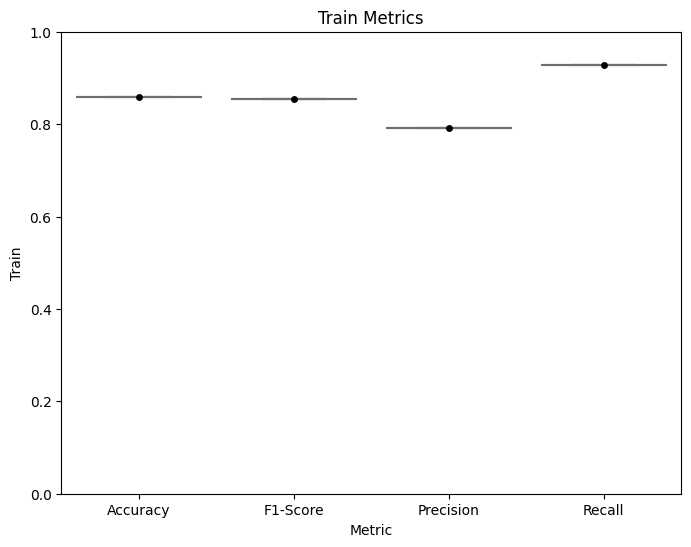

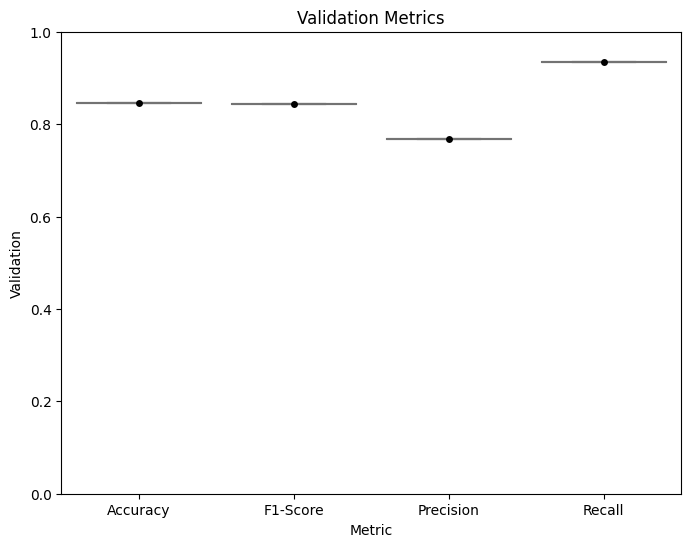

In [ ]:
# Obtener las predicciones del mejor modelo
y_train_pred = best_model.predict(X_train_transformado)
y_val_pred = best_model.predict(X_val_transformado)

# Calcular todas las métricas
train_accuracy = accuracy_score(ytrain, y_train_pred)
val_accuracy = accuracy_score(yval, y_val_pred)
train_f1_score = f1_score(ytrain, y_train_pred)
val_f1_score = f1_score(yval, y_val_pred)
train_precision = precision_score(ytrain, y_train_pred)
val_precision = precision_score(yval, y_val_pred)
train_recall = recall_score(ytrain, y_train_pred)
val_recall = recall_score(yval, y_val_pred)

# Crear un DataFrame con las métricas
metrics_df = pd.DataFrame({'Metric': ['Accuracy', 'F1-Score', 'Precision', 'Recall'],
                           'Train': [train_accuracy, train_f1_score, train_precision, train_recall],
                           'Validation': [val_accuracy, val_f1_score, val_precision, val_recall]})

# Diagramas de caja y bigote de las métricas
plt.figure(figsize=(8, 6))
sns.boxplot(data=metrics_df, x='Metric', y='Train', color='skyblue')
sns.stripplot(data=metrics_df, x='Metric', y='Train', color='black', size=5)
plt.title('Train Metrics')
plt.ylim(0, 1)
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(data=metrics_df, x='Metric', y='Validation', color='lightgreen')
sns.stripplot(data=metrics_df, x='Metric', y='Validation', color='black', size=5)
plt.title('Validation Metrics')
plt.ylim(0, 1)
plt.show()

#**Ejercicio-6.**
Verifica que el modelo no esté subentrenado o sobreentrenado mediante alguna de las gráficas de curvas de entrenamiento (aumentando la complejidad o aumentando el conjunto de entrenamiento, la que consideres más adecuada). De ser necesario, realiza los ajustes necesarios para evitar alguno de estos problemas.

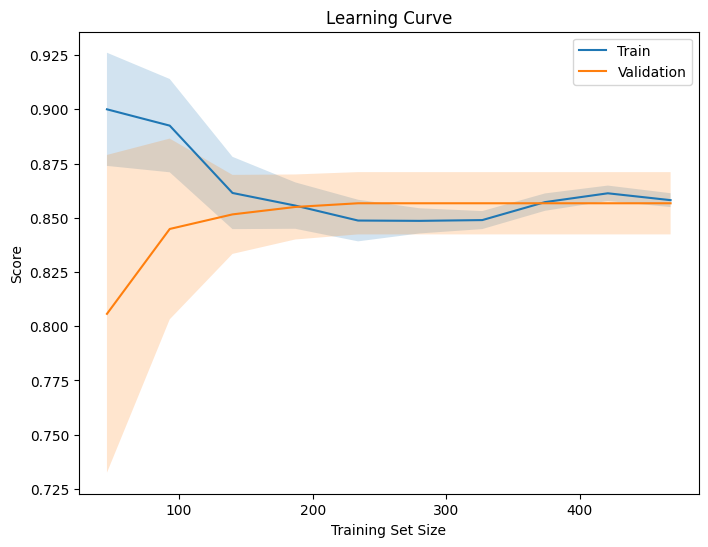

In [ ]:
# Función para generar las curvas de aprendizaje
def plot_learning_curve(estimator, X, y, cv, train_sizes):
    train_sizes, train_scores, val_scores = learning_curve(estimator, X, y, cv=cv, train_sizes=train_sizes)

    # Calcular los promedios y las desviaciones estándar de las puntuaciones
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)
    val_scores_std = np.std(val_scores, axis=1)

    # Graficar las curvas de aprendizaje
    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_scores_mean, label='Train')
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2)
    plt.plot(train_sizes, val_scores_mean, label='Validation')
    plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                     val_scores_mean + val_scores_std, alpha=0.2)
    plt.xlabel('Training Set Size')
    plt.ylabel('Score')
    plt.legend()
    plt.title('Learning Curve')
    plt.show()

# Definir los tamaños de conjunto de entrenamiento a evaluar
train_sizes = np.linspace(0.1, 1.0, 10)

# Generar las curvas de aprendizaje
plot_learning_curve(best_model, X_train_transformado, ytrain, cv=5, train_sizes=train_sizes)

#**Ejercicio-7.**

Con los mejores hiperparámetros entontrados encontrar la gráfica de la curva ROC y su área bajo la curva.

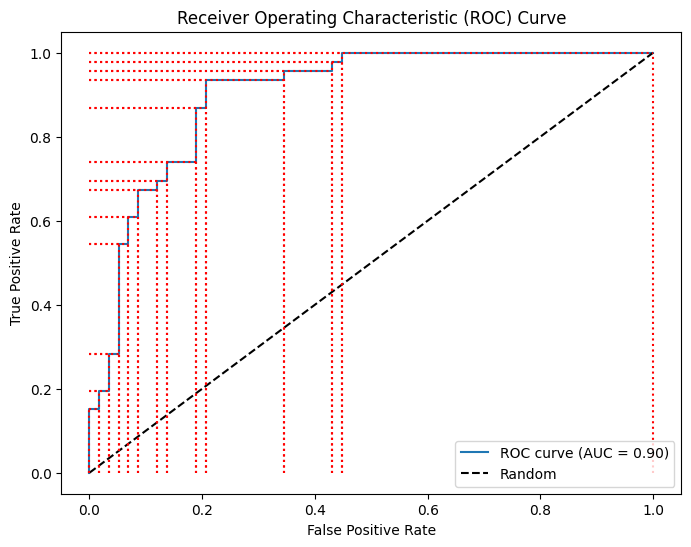

In [ ]:
from sklearn import metrics

# Get the scores using decision_function
scores_val = best_model.decision_function(X_val_transformado)

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(yval, scores_val)

#cm=confusion_matrix(ytest, y_val_pred)

# Calculate the AUC
auc = roc_auc_score(yval, scores_val)

# Plot the ROC curve

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.hlines(tpr, 0, fpr, colors='r', linestyles='dotted')  # Se calcula TPrate y FPrate con base a threshold=0.5
plt.vlines(fpr, 0, tpr, colors='r', linestyles='dotted')
plt.show()

In [ ]:
# Obtener los puntajes utilizando decision_function
scores_val = best_model.decision_function(X_val_transformado)

# Calcular el AUC
auc = roc_auc_score(yval, scores_val)

print('AUC:', auc)

AUC: 0.8991754122938531


#**Ejercicio-8.**
Encontrar el valor del mejor umbral de predicción del modelo que maximice el valor de la métrica f1-score.

In [ ]:
# Obtener los puntajes utilizando decision_function
scores_val = best_model.decision_function(X_val_transformado)

# Crear una lista para almacenar los valores de f1-score
f1_scores = []

# Probar diferentes umbrales de predicción
thresholds = np.linspace(np.min(scores_val), np.max(scores_val), 100)
for threshold in thresholds:
    # Convertir los puntajes en etiquetas binarias utilizando el umbral
    y_pred = np.where(scores_val >= threshold, 1, 0)
    # Calcular el f1-score utilizando las etiquetas predichas
    f1 = f1_score(yval, y_pred)
    # Agregar el valor del f1-score a la lista
    f1_scores.append(f1)

# Encontrar el umbral que maximiza el f1-score
best_threshold = thresholds[np.argmax(f1_scores)]
best_f1_score = np.max(f1_scores)

print('Mejor umbral:', best_threshold)
print('Mejor F1-Score:', best_f1_score)

Mejor umbral: -0.08777914119987074
Mejor F1-Score: 0.8431372549019608


#**Ejercicio-9.**
Encontrar el valor del mejor umbral de predicción del modelo que maximice el valor de la métrica g- mean.

In [ ]:
# Obtener los puntajes utilizando decision_function
scores_val = best_model.decision_function(X_val_transformado)

# Crear una lista para almacenar los valores de g-mean
g_mean_scores = []

# Probar diferentes umbrales de predicción
thresholds = np.linspace(np.min(scores_val), np.max(scores_val), 100)
for threshold in thresholds:
    # Convertir los puntajes en etiquetas binarias utilizando el umbral
    y_pred = np.where(scores_val >= threshold, 1, 0)
    # Calcular la matriz de confusión utilizando las etiquetas predichas
    tn, fp, fn, tp = confusion_matrix(yval, y_pred).ravel()
    # Calcular el g-mean utilizando los valores de la matriz de confusión
    g_mean = np.sqrt(tp / (tp + fn) * tn / (tn + fp))
    # Agregar el valor del g-mean a la lista
    g_mean_scores.append(g_mean)

# Encontrar el umbral que maximiza el g-mean
best_threshold = thresholds[np.argmax(g_mean_scores)]
best_g_mean = np.max(g_mean_scores)

print('Mejor umbral:', best_threshold)
print('Mejor G-Mean:', best_g_mean)

Mejor umbral: -0.08777914119987074
Mejor G-Mean: 0.8516233726334619


#**Ejercicio-10.**
Incluye tus conclusiones finales de la actividad.

Al analizar el problema de clasificación en un conjunto de datos desbalanceado, hemos realizado un análisis comparativo entre un modelo Dummy y el modelo actual.

El modelo Dummy, que utiliza una estrategia "stratified" para manejar el desbalanceo de clases, mostró un rendimiento modesto con una precisión del 52% y un F1-Score del 46%. Estos resultados indican que el modelo no logra una alta precisión ni un equilibrio óptimo entre la precisión y el recall en la clasificación de las clases de créditos aprobados y no aprobados.

Sin embargo, al obtener los mejores hiperpárametros para aplicar un modelo más sofisticado, hemos obtenido un rendimiento significativamente superior. El modelo actual ha logrado una precisión del 84%, un F1-Score del 84%, y un G-Mean del 85%, lo cual indica un rendimiento mucho más sólido en la clasificación.

Estas mejoras son especialmente destacables considerando que el conjunto de datos original presentaba un desbalanceo en las clases, con aproximadamente el 44.5% de créditos aprobados y el 55.5% de créditos no aprobados. El modelo actual ha demostrado ser efectivo en abordar este desafío y lograr una clasificación más precisa y equilibrada.

Además, al analizar el área bajo la curva (AUC) obtenido, que es de 0.899, podemos concluir que el modelo tiene una alta capacidad de distinguir entre las clases y hacer predicciones correctas.

En resumen, el modelo actual ha superado significativamente al modelo Dummy en términos de rendimiento y métricas de evaluación. Ha logrado una mejora sustancial en la precisión, el F1-Score y el G-Mean, lo que indica una clasificación más precisa y equilibrada de las clases en el conjunto de datos desbalanceado. Estos resultados respaldan la efectividad del modelo propuesto y sugieren su utilidad en la tarea de clasificación de créditos.

Es importante destacar que, si bien el modelo actual muestra un rendimiento prometedor, es recomendable realizar una evaluación adicional, considerando las necesidades y requisitos específicos del proyecto, así como examinar otras métricas relevantes para determinar la idoneidad y el rendimiento general del modelo en el contexto particular del problema.

In [ ]:
None

###**Fin de la Actividad de la semana 8.**